In [1]:
import numpy as np
import pandas as pd
import os
import datetime
from matplotlib import pyplot as plt

In [2]:
def read_txt(filename):
    save_ls = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.split(',')
            for val in line:
                save_ls.append(val)
    return save_ls

# read in sensor data
p2 = read_txt('./collection2/CS109a_pressure.txt')
p3 = read_txt('./collection3/CS109a_pressure.txt')
p4 = read_txt('./collection4/CS109a_pressure.txt')
p5 = read_txt('./collection5/CS109a_pressure.txt')

In [3]:
# generate start times (every 30 minutes) from initial start dates
oct29 = datetime.datetime(2019, 10, 29, hour=12, minute=42)
nov3 = datetime.datetime(2019, 11, 3, hour=9, minute=30)
nov6 = datetime.datetime(2019, 11, 6, hour=21, minute=13)
nov11 = datetime.datetime(2019, 11, 11, hour=12, minute=50)

def compute_time_int(start_dt, pressure):
    dates = [start_dt]
    for i in range(len(pressure)-1): 
        dates.append(dates[i] + datetime.timedelta(minutes=30))
    df = pd.DataFrame({'date': dates,'pressure': pressure})
    df.drop(df.tail(1).index,inplace=True)
    return df
    

df1 = compute_time_int(oct29, p2)
df2 = compute_time_int(nov3, p3)
df3 = compute_time_int(nov6, p4)
df4 = compute_time_int(nov11, p5)
# drop last empty row

In [6]:
def convert_to_float(dfs):
    for df in dfs:
        df.hum = [float(i) for i in df.pressure]
        
dfs = [df1,df2,df3,df4]   
convert_to_float(dfs)

In [7]:
pressure = pd.concat([df1,df2,df3,df4], axis=0)

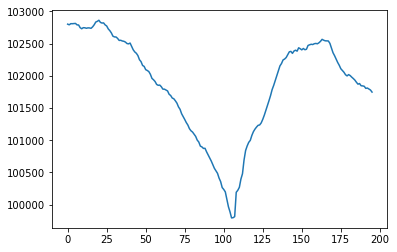

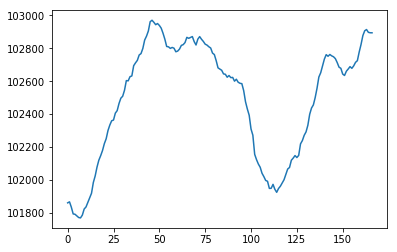

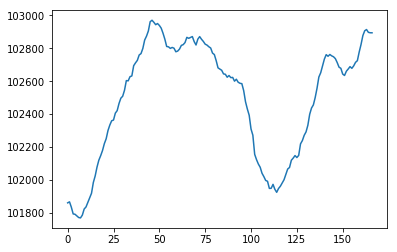

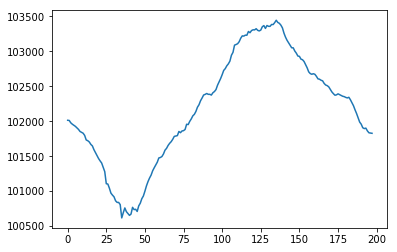

In [8]:
for df in dfs:
    plt.plot(df.pressure) #np.arange(humidity.shape[0]),
    plt.show()

In [9]:
def find_rows(df, day_of_interest):
    rows = []
    for i,dt in enumerate(df.date):
        if dt.day == day_of_interest:
            rows.append(i) 
    return rows

def plot_days(df, data_name, rows, label):
    
    # Create x axis based on hour of day
    x_plot = []
    for i,dt in enumerate(df.date):
        x_vals = dt.hour + dt.minute/60
#         print(x_vals)
        x_plot.append(x_vals)
    
    # Plot hour of day vs. data value
    plt.scatter(x_plot[rows[0]:rows[0]+len(rows)], df[data_name].values[rows],  
                label = label, alpha = 0.5, cmap = 'RdPu')

    # Label plot
    plt.xlabel('Hour of Day', fontsize = 15)
    plt.ylabel('Data Value', fontsize = 15)
    plt.legend()

In [10]:
days = []
for dt in pressure.date:
    days.append(dt.day)
days = np.unique(days)

indices_of_dates = []
for day in days:
    indices_of_dates.append(find_rows(pressure,day))

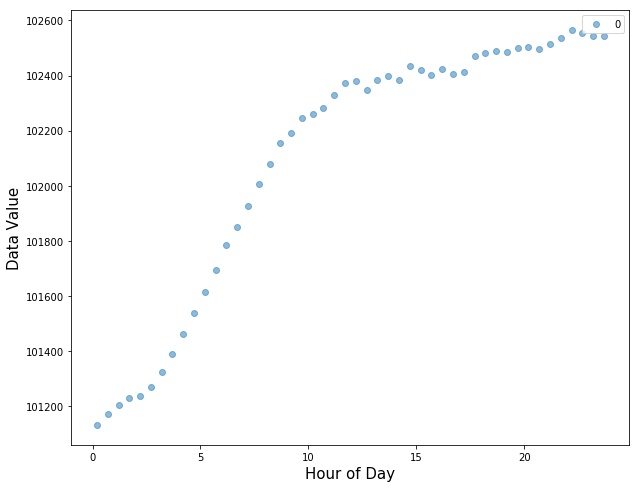

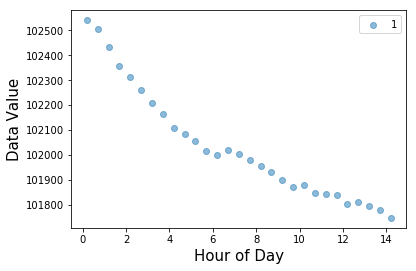

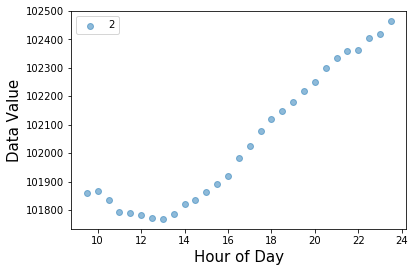

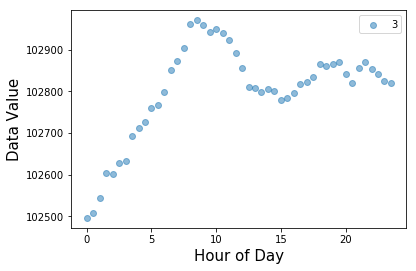

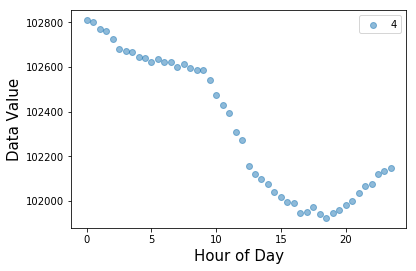

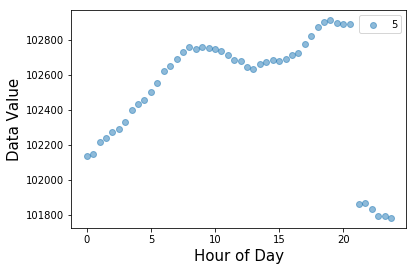

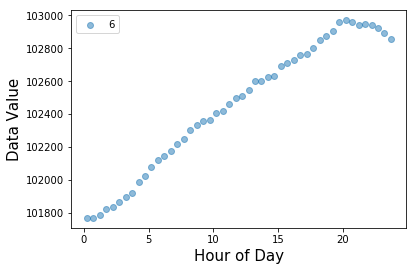

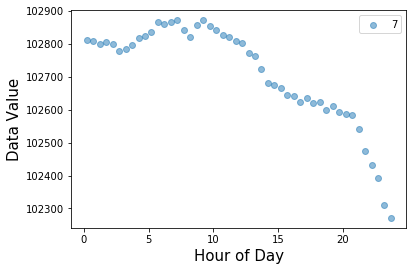

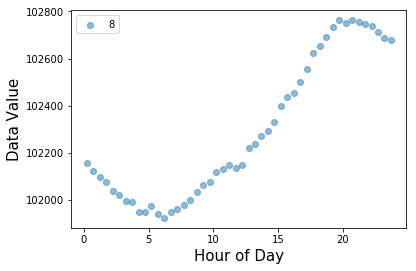

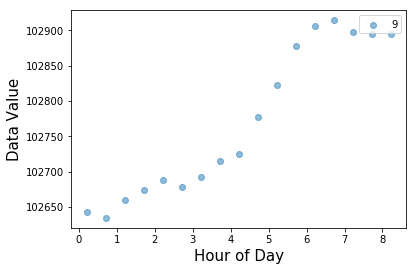

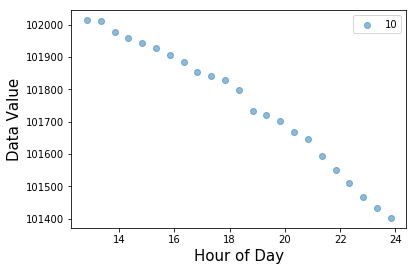

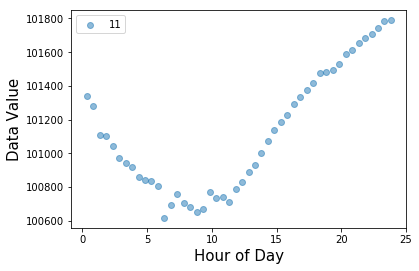

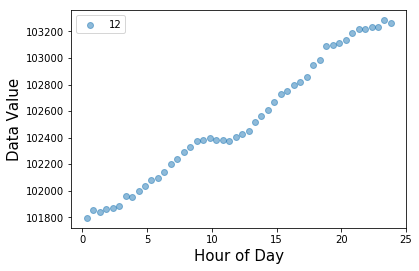

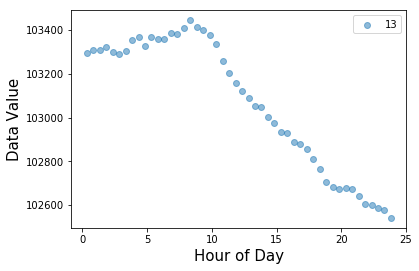

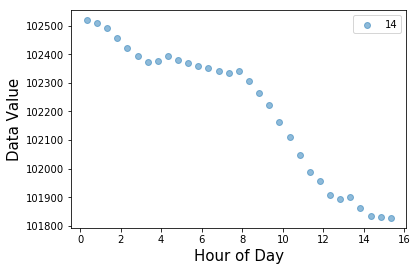

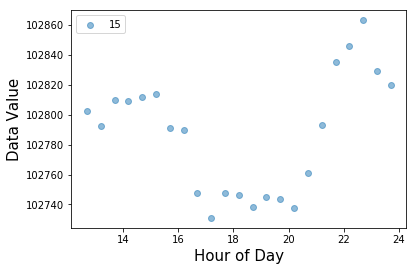

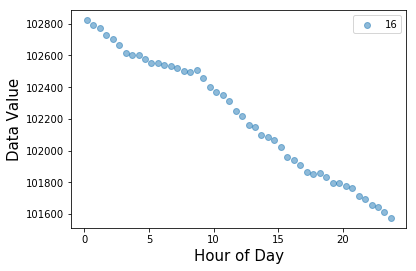

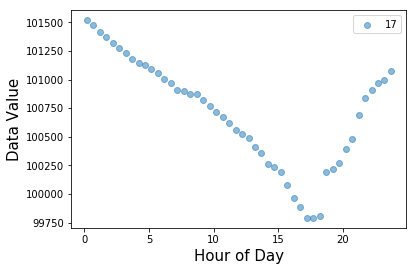

In [11]:
plt.subplots(figsize = (10,8))

for i in range(len(indices_of_dates)):
    plot_days(pressure, 'pressure', indices_of_dates[i], str(i))
    plt.show()

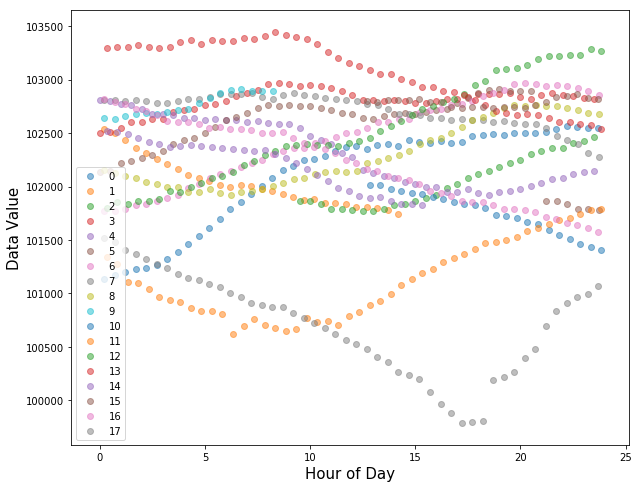

In [22]:
plt.subplots(figsize = (10,8))

for i in range(len(indices_of_dates)):
    plot_days(pressure, 'pressure', indices_of_dates[i], str(i))
plt.show()

In [ ]:
# look at over a week